<a href="https://colab.research.google.com/github/ainurrohman01/Image_Classification/blob/main/Image_Classification_Deployment_Ainur_Rohman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Ainur Rohman

Email : ainur.solver@gmail.com

# Data Collecting

Sumber : https://towardsdatascience.com/how-to-use-kaggle-datasets-in-google-colab-bca5e452a676

In [ ]:
# Menginstall kaggle : Berfungsi memudahkan dalam mengorganisi package dataset dari kaggle
!pip install -q kaggle

In [ ]:
# Code ini berfungsi untuk mengupload API kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ainurrohman","key":"4fb0f5551dc0f7d0b214aeb6b2fc9515"}'}

In [ ]:
! mkdir -p ~/.kaggle              # Membuat direktori kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json # Untuk memberikan akses terbatas

In [ ]:
! kaggle --version

Kaggle API 1.5.4


In [ ]:
# Mendownload dataset "four-shapes"
!kaggle datasets download -d smeschke/four-shapes

 88% 19.0M/21.6M [00:00<00:00, 57.6MB/s]
100% 21.6M/21.6M [00:00<00:00, 85.6MB/s]


In [ ]:
# Membuat direktori four-shapes

!mkdir four-shapes

In [ ]:
# Mengekstrak fil zip
!unzip -qq four-shapes.zip -d four-shapes

!ls four-shapes/shapes

circle	square	star  triangle


In [ ]:
# Image classification

# https://www.tensorflow.org/tutorials/images/classification
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb

# Data Preprocessing

In [ ]:
# Import library yang digunakan

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.preprocessing import image
import tensorflow as tf

Membaca Dataset hasil unzip

In [ ]:
four_shapes = os.path.join('/content/four-shapes/shapes/')

print(os.listdir(four_shapes))

['circle', 'square', 'star', 'triangle']
28


In [ ]:
# contoh kode lain dari dicoding:

import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

os.listdir('/tmp/Chessman-image-dataset/Chess')

In [ ]:
print('total circle images :', len(os.listdir('/tmp/four-shapes/shapes/circle')))
print('total square images :', len(os.listdir('/tmp/four-shapes/shapes/square')))
print('total star images :', len(os.listdir('/tmp/four-shapes/shapes/star')))
print('total triangle images :', len(os.listdir('/tmp/four-shapes/shapes/triangle')))

Membuat augmentasi gambar

In [ ]:
# Kalau jumlah class di dataset sudah banyak, mending cukup pakai rescale sama validation split aja. Agar tidak overfitting dan pelatihannya lama tapi akurasi stuck.

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

# Resizing, cropping, rotating, flipping(mirror), drawing, color tansform (convert RGB to Grayscale atau color space lain),
# image enhacement (sharpening, filtering, blurring, contrass, brightness), edge detection.



# image augmentation basic : https://machinelearningknowledge.ai/keras-imagedatagenerator-for-image-augmentation/
# Sumber : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# Sumber :
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://stepup.ai/exploring_data_augmentation_keras/

"""
We can apply various changes to the initial data. For example, for images we can use:

   1. Geometric transformations – you can randomly flip, crop, rotate or translate images, and that is just the tip of the iceberg
   2. Color space transformations – change RGB color channels, intensify any color
   3. Kernel filters – sharpen or blur an image 
   4. Random Erasing – delete a part of the initial image
   5. Mixing images – basically, mix images with one another. Might be counterintuitive but it works

# https://neptune.ai/blog/data-augmentation-in-python

"""

# https://stepup.ai/train_data_augmentation_keras/
# https://stepup.ai/custom_data_augmentation_keras/
# https://keras.io/api/preprocessing/image/#imagedatagenerator-class
# https://stepup.ai/test_time_data_augmentation/

# https://www.kaggle.com/xhlulu/exploration-and-preprocessing-for-keras-224x224

# API TF : https://www.tensorflow.org/api_docs/python/tf/image

# https://www.dicoding.com/academies/185/discussions/113772

# Membagi dataset sebanyak 20 % untuk test set
# Mengecek banyak data (sample data >10000 data)

In [ ]:
train_generator = train_datagen.flow_from_directory(
      four_shapes,
      target_size=(224, 224),   # 224 sesuai shape arsitektur vgg 16
      batch_size=32,     
      class_mode='categorical',
      subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
      four_shapes, # same directory as training data
      target_size=(224, 224),   # 224 sesuai shape arsitektur vgg 16
      batch_size=32,     
      class_mode='categorical',
      subset='validation')


Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.


In [ ]:
# Melihat class data training 

class_names = train_generator.class_names
print(class_names)

# sumber : https://www.tensorflow.org/tutorials/images/classification

In [ ]:
# untuk plotting gambar

plt.figure(figsize=(15, 15))
for images, labels in train_generator.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")

In [ ]:
# Plot gambar hasil augmentasi

plt.figure(figsize=(10, 10))
for images, _ in train_generator.take(1):
    for i in range(9):
        augmented_images = train_datagen(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")



plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

# https://www.tensorflow.org/tutorials/images/data_augmentation
# sumber : https://www.kaggle.com/eadrngrrsnchz/notebook-flowers
# https://www.kaggle.com/bill2462/classification-using-densenet-92-acc

# Menggunakan arsitektur VGG16

In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))   # 224 sesuai dengan shape pada arsitektur vgg 16
model.trainable = False
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

CNN Architecture: 

https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/

https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

https://www.kaggle.com/blurredmachine/vggnet-16-architecture-a-complete-guide: VGG is the Visual Geometry Group, which belongs to the Department of Science and Engineering of Oxford University. It has released a series of convolutional network models beginning with VGG, which can be applied to face recognition and image classification, from VGG16 to VGG19. The original purpose of VGG's research on the depth of convolutional networks is to understand how the depth of convolutional networks affects the accuracy and accuracy of large-scale image classification and recognition. -Deep-16 CNN), in order to deepen the number of network layers and to avoid too many parameters, a small 3x3 convolution kernel is used in all layers.

https://neurohive.io/en/popular-networks/vgg16/
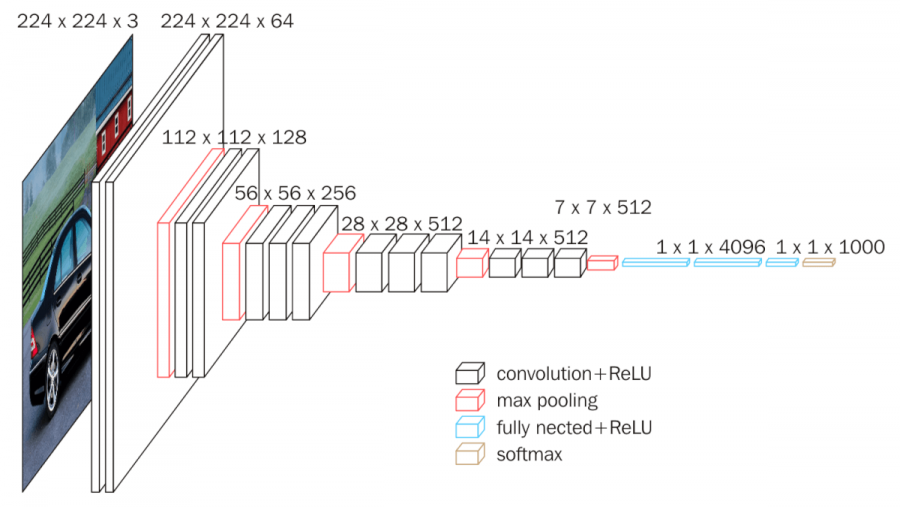

# Membuat Arsitektur Menggunakan Model Sequential dan Conv2D Maxpooling Layer

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dense(256, activation='relu'),     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),                           # drop out perceptron di layer sebanyak 50 % selama proses training
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')          # Sesuai kelas yang dipakai
])

model.summary()

# keras layers docs : https://keras.io/api/layers/

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dense_3 (Dense)              (None, 17, 17, 256)      

"\nmodel = tf.keras.models.Sequential([\n    four-shapes,  \n    # Flatten the results to feed into a DNN\n    tf.keras.layers.Flatten(),\n    # 512 neuron hidden layer\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dropout(0.5),\n    tf.keras.layers.Dense(256, activation='relu'),\n    tf.keras.layers.Dense(5, activation='softmax')   \n])\n"

Tips For Using Dropout

The original paper on Dropout provides experimental results on a suite of standard machine learning problems. As a result they provide a number of useful heuristics to consider when using dropout in practice.


*  Generally, use a small dropout value of 20%-50% of neurons with 20%. providing a good starting point. A probability too low has minimal effect and a value too high results in under-learning by the network.
*  Use a larger network. You are likely to get better performance when dropout is used on a larger network, giving the model more of an opportunity to learn independent representations.
*  Use dropout on incoming (visible) as well as hidden units. Application of dropout at each layer of the network has shown good results.
*  Use a large learning rate with decay and a large momentum. Increase your learning rate by a factor of 10 to 100 and use a high momentum value of 0.9 or 0.99.
*  Constrain the size of network weights. A large learning rate can result in very large network weights. Imposing a constraint on the size of network weights such as max-norm regularization with a size of 4 or 5 has been shown to improve results.

Sumber : https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# Menggunakan Fungsi Callback

Callback Function berfungsi untuk memberi tahu model kita untuk berhenti ketika telah mencapai akurasi tertentu, sehingga proses pelatihan model menjadi lebih singkat dan untuk efisiensi waktu pelatihan.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi sudah diatas 92 %")
      self.model.stop_training = True

callbacks = myCallback()

#Menggunakan optimizer

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])                        # metrik evaluasi yang digunakan adalah accuracy


"""
Jika menggunakan learning rate :
from keras.optimizers import Adam
opt = Adam(lr=0.001)

model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Sumber : https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
"""

Loss funtion adalah fungsi untuk menghitung error yang paling sederhana adalah MAE , hitung selisih nilai prediksi dibanding nilai asli lalu di rata-rata

Optimizer adalah algoritma untuk "mengusahakan" agar nilai loss funtion sekecil mungkin , yang biasa dipakai adalah "adam" , ada juga "SGD" dll

Sumber : https://www.dicoding.com/academies/185/discussions/55064

# Pelatihan model

In [ ]:
num_epochs = 100

history = model.fit(train_generator, steps_per_epoch=10, epochs=num_epochs, validation_data=validation_generator, callbacks=[callbacks], verbose=1)

Epoch 1/100
10/10 [==============================] - 93s 10s/step - loss: 1.8659 - accuracy: 0.2531 - val_loss: 1.3648 - val_accuracy: 0.2485
Epoch 2/100
10/10 [==============================] - 91s 10s/step - loss: 1.3407 - accuracy: 0.3656 - val_loss: 1.2557 - val_accuracy: 0.3647
Epoch 3/100
10/10 [==============================] - 91s 10s/step - loss: 1.2125 - accuracy: 0.3750 - val_loss: 1.0590 - val_accuracy: 0.4068
Epoch 4/100
10/10 [==============================] - 92s 10s/step - loss: 1.0520 - accuracy: 0.4500 - val_loss: 0.9596 - val_accuracy: 0.5094
Epoch 5/100
10/10 [==============================] - 90s 10s/step - loss: 0.9394 - accuracy: 0.5031 - val_loss: 0.8612 - val_accuracy: 0.5187
Epoch 6/100
10/10 [==============================] - 90s 10s/step - loss: 0.8387 - accuracy: 0.5406 - val_loss: 0.7585 - val_accuracy: 0.6072
Epoch 7/100
10/10 [==============================] - 90s 10s/step - loss: 0.9583 - accuracy: 0.5250 - val_loss: 0.7594 - val_accuracy: 0.6089
Epoch 

**Akurasi training dan validation set diatas 93 % (Diatas 92 %)**

# Membuat Plot Grafik Hasil

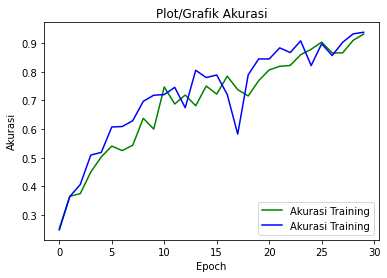

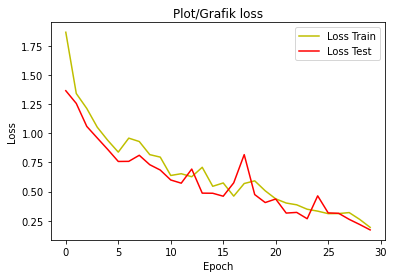

In [ ]:
plt.plot(history.history['accuracy'], 'g')
plt.plot(history.history['val_accuracy'], 'b')
plt.title('Plot/Grafik Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Akurasi Training','Akurasi Training'], loc='lower right')
plt.show()

plt.plot(history.history['loss'], 'y')
plt.plot(history.history['val_loss'], 'r')
plt.title('Plot/Grafik loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Test'], loc='upper right')
plt.show()

In [ ]:
# Model predict

predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))

# Perbaikin variable dan sebagainya
# Sumber: https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

In [ ]:
"""

# Mengecek class gambar:

print(train_generator.class_indices)
 
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

"""

Learning Curve: https://www.baeldung.com/cs/learning-curve-ml, https://www.dataquest.io/blog/learning-curves-machine-learning/

Learning curve to measure performance model machine learning (training and valiadation). Overfitting (High Variance), Underfitting (High Bias), Ideal/Good Fitting.

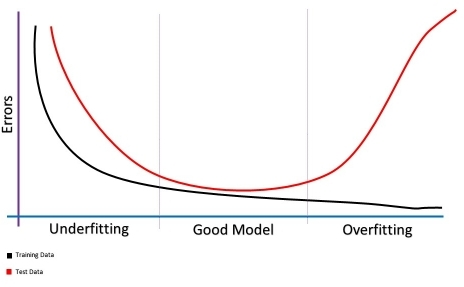

Memprediksi gambar

Saving 1.png to 1 (4).png
------------------------*****-------------------------
[[0. 0. 1. 0.]]
------------------------*****-------------------------
Gambar tersebut adalah 'triangle'
------------------------*****-------------------------


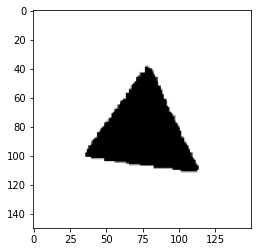

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  array = model.predict(x)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)


  print("------------------------*****-------------------------")
  print(array)
  print("------------------------*****-------------------------")
  if classes[0,0]!=0:
    print("Gambar tersebut adalah 'star'")
  elif classes[0,1]!=0:
    print("Gambar tersebut adalah 'circle'")
  elif classes[0,2]!=0:
    print("Gambar tersebut adalah 'triangle'")
  else:
    print("Gambar tersebut adalah 'square'")
  
  print("------------------------*****-------------------------")


Saving 5.png to 5 (8).png
------------------------*****-------------------------
[[0. 0. 0. 1.]]
------------------------*****-------------------------
Gambar tersebut adalah 'square'
------------------------*****-------------------------


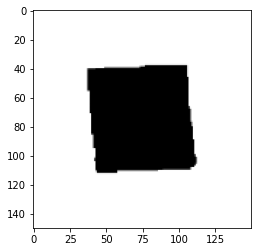

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  array = model.predict(x)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)


  print("------------------------*****-------------------------")
  print(array)
  print("------------------------*****-------------------------")
  if classes==0:
    #print("Gambar tersebut adalah 'star'")
  elif classes==1:
    #print("Gambar tersebut adalah 'circle'")
  elif classes==2:
    #print("Gambar tersebut adalah 'triangle'")
  else:
    #print("Gambar tersebut adalah 'square'")

  # CARA MENGECEK KELAS GIMANA DAH YAA CODENYA
  
  print("------------------------*****-------------------------")

In [ ]:
"""
Contoh lain code model predict and save model

from keras.preprocessing import image
img = image.load_img("image.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("vgg16_1.h5")

output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

Sumber: https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
"""

# Menyimpan Model ke Format TF-Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)


!ls -la | grep 'model'

INFO:tensorflow:Assets written to: /tmp/tmpk7albg8e/assets


INFO:tensorflow:Assets written to: /tmp/tmpk7albg8e/assets


-rw-r--r-- 1 root root 152118440 Jul  8 02:43 model.tflite


Tambahan

In [ ]:
# Solusi kalau takut disconnect runtime di google colab, silahkan jalankan kode berikut ini
while True:pass       #Referensi: https://www.dicoding.com/academies/185/discussions/83522
# Selama cell tersebut dijalankan, maka akan terjadi infinite loop, sehingga runtimenya tidak akan terputus.

Split folder : https://www.dicoding.com/academies/185/discussions/85457

How to kill overfitting and underfitting

1.   Coba tambahkan Transfer Learning dan kurangi augmentasi imagenya : https://www.dicoding.com/academies/185/discussions/82997
2.   Coba tuning parameter : https://www.dicoding.com/academies/185/discussions/82752
3. Menggunakan pre-trained model, seperti: VGGNet, ResNet, Xception : https://www.dicoding.com/academies/185/discussions/82752
4. Bergantung pada variasi dataset dan augmentasi juga banyak : https://www.dicoding.com/academies/185/discussions/65057
5. https://www.dicoding.com/academies/185/discussions/64085
6. https://www.dicoding.com/academies/185/discussions/62389
7. Data saya masih overfitting : https://www.dicoding.com/academies/184/discussions/53004

Untuk mengecek label untuk hasil prediksi, sesuai array : https://www.dicoding.com/academies/185/discussions/82497

Prediksi belum tepat : 

https://www.dicoding.com/academies/185/discussions/64312
https://www.dicoding.com/academies/185/discussions/64277

Membuat callback : https://www.dicoding.com/academies/185/discussions/90980

TFLite converter : https://www.dicoding.com/academies/185/discussions/111497

Akurasi stuck dan training lama : https://www.dicoding.com/academies/185/discussions/113337

Arsitektur Pra-trained model : https://www.dicoding.com/academies/185/discussions/115917



mengatasi imbance dataset : https://www.youtube.com/watch?v=lKN076dleoA&list=PL8P_Z6C4GcuU4knhhCouJujFZ2tTqU-Ta&index=5

Cara melakukan feature engineering : https://www.kdnuggets.com/2018/12/feature-engineering-explained.html

Apakah Convolution dan MaxPooling bisa dianggap sebagai hidden layer? : https://www.dicoding.com/academies/184/discussions/41221


Filterkan hanya sebuah angka angka(matrix), nah angka angka itu didapat dari mana? misal pada saat gambar wajah dikonvolusi itu prosesnya bagaimana? : https://www.dicoding.com/academies/184/discussions/38346

Matrix konvolusi pada CNN : https://www.dicoding.com/academies/184/discussions/38341

Penerapan sinyal pada 1-D (Pengolahan sinyal) : https://www.dicoding.com/academies/184/discussions/111357

Save model h5 : https://www.dicoding.com/academies/184/discussions/111147

Model machine learning mempelajari pola pada suatu sample lalu mengupdate cara dia memperkirakan hasil berdasarkan error dari sample yang dia pelajari lalu mengulangi langkah yang sama dengan sample selanjutnya sampai mencapai jumlah Epoch yang kita masukkan. Lalu apa itu bach? Bach dalam machine learning artinya model tidak mengupdate caranya memperkirakan hasil setiap selesai mempelajari 1 sample. Model baru mengupdatenya saat sejumlah sample dipelajari sesuai dengan jumlah bach yang kita masukkan. Dari sini kamu sudah dapat gambaran apa itu bach?
: https://www.dicoding.com/academies/184/discussions/71027

Menggunakan dataset grayscale : https://www.dicoding.com/academies/184/discussions/70327

Bagaimana cara menentukan shape, dan filter pada setiap layer : https://www.dicoding.com/academies/184/discussions/58854

Bagaimana kita menentukan perceptron yang tepat? : https://www.dicoding.com/academies/184/discussions/96316

Tentang perceptron : https://www.dicoding.com/academies/184/discussions/68677

Apa itu epoch ? : https://www.dicoding.com/academies/184/discussions/110122

Pergerakan pada simulasi ANN : https://www.dicoding.com/academies/184/discussions/68972

